# MSA 2023 Phase 2 - Part 1

In [82]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [83]:
#Reading in CSV file
MarketData = pd.read_csv('market_segmentation.csv')

#printing first 10 records
MarketData.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [84]:
#Finding number of records in file
MarketData.shape

(8068, 11)

In [85]:
#Finding number of null values
MarketData.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [86]:
#finding gender split
NumMale = MarketData.Gender.value_counts().Male
ProportionMale = NumMale/MarketData.shape[0]

print("The proportion of males in the dataset is " + str(ProportionMale))


The proportion of males in the dataset is 0.5474714923153198


In [87]:
#Finding Mean and standard deviation of age
MeanAge = MarketData.Age.mean()
AgeStd = MarketData.Age.std()


print("Mean age is " + str(MeanAge) + "\nStandard deviation of age is " + str(AgeStd))

Mean age is 43.46690629647992
Standard deviation of age is 16.71169631872121


In [88]:
#finding proportion graduated
NumGrad = MarketData.Graduated.value_counts().Yes
ProportionGrad = NumGrad/MarketData.shape[0]
GradnNull = MarketData.Graduated.isnull().sum()/MarketData.shape[0]

print("The proportion of graduates in the dataset is " + str(ProportionGrad))
print("The proportion where Graduated is null is " + str(GradnNull))

The proportion of graduates in the dataset is 0.615765989092712
The proportion where Graduated is null is 0.009667823500247892


In [89]:
#finding professions
ProfProp = MarketData.Profession.value_counts()/MarketData.shape[0]
nullWorkers = MarketData.Profession.isnull().sum()/MarketData.shape[0]


print(ProfProp)
print("The proportion where profession is null is "+ str(nullWorkers))


Artist           0.311849
Healthcare       0.165097
Entertainment    0.117625
Engineer         0.086639
Doctor           0.085275
Lawyer           0.077219
Executive        0.074244
Marketing        0.036192
Homemaker        0.030491
Name: Profession, dtype: float64
The proportion where profession is null is 0.015369360436291522


In [90]:
#Finding Mean and standard deviation of age
MeanExperience = MarketData.Work_Experience.mean()
ExperienceStd = MarketData.Work_Experience.std()
nullExperience = MarketData.Work_Experience.isnull().sum()

print("Mean work experince is " + str(MeanExperience) + "\nStandard deviation of work experience is " + str(ExperienceStd))
print("There are "+ str(nullExperience) + " people where profession is null")

Mean work experince is 2.641663213150988
Standard deviation of work experience is 3.4067629854579518
There are 829 people where profession is null


In [91]:
#Finding proportions for each spending score (from null count before we know there are no records where this has a null value)
SpendingProps = MarketData.Spending_Score.value_counts()/MarketData.shape[0]

print(SpendingProps)


Low        0.604611
Average    0.244670
High       0.150719
Name: Spending_Score, dtype: float64


In [92]:
#finding mean and standard deviation for the family sizes
MeanSize = MarketData.Family_Size.mean()
SizeStd = MarketData.Family_Size.std()
nullSize = MarketData.Family_Size.isnull().sum()

print("Mean family size is " + str(MeanSize) + "\nStandard deviation of family size is " + str(SizeStd))
print("There are "+ str(nullSize) + " people where family size is null")

Mean family size is 2.85012285012285
Standard deviation of family size is 1.5314132820253783
There are 335 people where family size is null


In [93]:
#finding the proportions for each value of Var_1
Var_1s = MarketData.Var_1.value_counts()/MarketData.shape[0]

print(Var_1s)

Cat_6    0.649232
Cat_4    0.134978
Cat_3    0.101884
Cat_2    0.052305
Cat_7    0.025161
Cat_1    0.016485
Cat_5    0.010535
Name: Var_1, dtype: float64


In [94]:
#Getting the proportions for each segment
Segments =  MarketData.Segmentation.value_counts()/MarketData.shape[0]

print(Segments)

D    0.281111
A    0.244422
C    0.244175
B    0.230293
Name: Segmentation, dtype: float64


In [95]:
#plotting box and whisker graphs for appropriate values
import graphing


graphing.box_and_whisker(MarketData, label_x="Segmentation", label_y="Age", show=True)

graphing.box_and_whisker(MarketData, label_x="Segmentation", label_y="Work_Experience", show=True)

graphing.box_and_whisker(MarketData, label_x="Segmentation", label_y="Family_Size")




These show weak correlation, but in some parts it is stronger than others, for example average age is strongly correlated, with D being youngest, then A then B then C. Has a similar, but weaker and inverse correlation, with D tending to have the most work experience, and the same order through C having the least work experience. Family size has less of a broad trend, but A is correlated strongly with smaller families than the other segments

## 2. Clean data

In [96]:
#I have decided in this case to just remove null values, it may be possible to replace them with the mean, but I have decided this is alright since there is still enough data to work with and this should give better results
MarketData = MarketData.dropna()
MarketData.shape

(6665, 11)

In [97]:
#converting professions to onehot then dropping the initial professions column and checking the resulting first rows
MarketDataOneHot = pd.get_dummies(MarketData, columns=["Profession"], drop_first=False)
MarketDataOneHot["Profession"] = MarketData.Profession

MarketDataOneHot = MarketDataOneHot.drop('Profession', axis=1)
MarketData = MarketDataOneHot
MarketData.head()


,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,Male,No,22,No,1.0,Low,4.0,Cat_4,D,0,0,0,0,0,1,0,0,0
2,466315,Female,Yes,67,Yes,1.0,Low,1.0,Cat_6,B,0,0,1,0,0,0,0,0,0
3,461735,Male,Yes,67,Yes,0.0,High,2.0,Cat_6,B,0,0,0,0,0,0,0,1,0
5,461319,Male,Yes,56,No,0.0,Average,2.0,Cat_6,C,1,0,0,0,0,0,0,0,0
6,460156,Male,No,32,Yes,1.0,Low,3.0,Cat_6,C,0,0,0,0,0,1,0,0,0


In [98]:
#repeating, but for "Var_1"
MarketDataOneHot = pd.get_dummies(MarketData, columns=["Var_1"], drop_first=False)
MarketDataOneHot["Var_1"] =MarketData.Var_1

MarketDataOneHot = MarketDataOneHot.drop('Var_1', axis=1)
MarketData = MarketDataOneHot
MarketData.head()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,Male,No,22,No,1.0,Low,4.0,D,0,...,0,0,0,0,0,0,1,0,0,0
2,466315,Female,Yes,67,Yes,1.0,Low,1.0,B,0,...,0,0,0,0,0,0,0,0,1,0
3,461735,Male,Yes,67,Yes,0.0,High,2.0,B,0,...,0,1,0,0,0,0,0,0,1,0
5,461319,Male,Yes,56,No,0.0,Average,2.0,C,1,...,0,0,0,0,0,0,0,0,1,0
6,460156,Male,No,32,Yes,1.0,Low,3.0,C,0,...,0,0,0,0,0,0,0,0,1,0


In [99]:
#removing ID, this is a unique value so will not be useful for classification model
MarketData = MarketData.drop('ID', axis=1)

In [100]:
#Converting Gender to boolean value
MarketData = MarketData.replace(to_replace="Male", value=1)
MarketData = MarketData.replace(to_replace="Female", value=0)

MarketData = MarketData.rename(columns={"Gender":"Is_Male"})


MarketData.head()


,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,No,22,No,1.0,Low,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,Yes,67,Yes,1.0,Low,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,Yes,67,Yes,0.0,High,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,Yes,56,No,0.0,Average,2.0,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,No,32,Yes,1.0,Low,3.0,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [101]:
#Same for ever married
MarketData = MarketData.replace(to_replace="Yes", value=1)
MarketData = MarketData.replace(to_replace="No", value=0)

MarketData.head()


,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.0,Low,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,Low,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,67,1,0.0,High,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,1,56,0,0.0,Average,2.0,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,32,1,1.0,Low,3.0,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
#For spending score, it has more than two values, but they are ordered so we can convert it to sequential data 
MarketData = MarketData.replace(to_replace="Low", value=1)
MarketData = MarketData.replace(to_replace="Average", value=2)
MarketData = MarketData.replace(to_replace="High", value=3)

MarketData.head()

,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.0,1,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,1,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,67,1,0.0,3,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,1,56,0,0.0,2,2.0,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,32,1,1.0,1,3.0,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [103]:
#normalising the initial numerical columns
for col in ('Age', 'Work_Experience', 'Family_Size'):
    MarketData[col] = MarketData[col]  / MarketData[col].abs().max()

Now all are data is numerical/boolean, and while this does make it more difficult to read, it means ml models will have a much easier time learning correlations


## 3. Visualise data

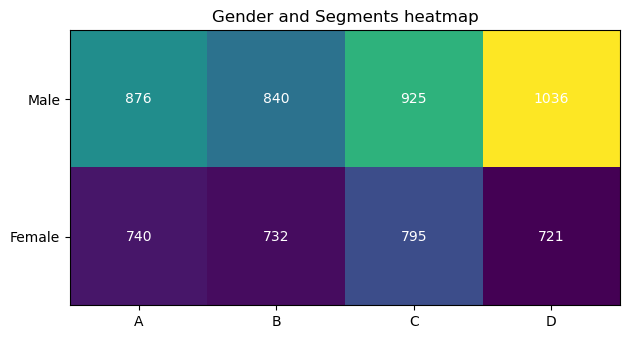

In [104]:
#Filtering the data into two sets then using that to create a heat map, comparing the counts for each segment between male and female records
MaleMarketData = MarketData[ MarketData["Is_Male"] == 1]
FemaleMarketData = MarketData[ MarketData["Is_Male"] == 0]

SegmentsMale =  MaleMarketData.Segmentation.value_counts()
SegmentsFemale =  FemaleMarketData.Segmentation.value_counts()


SegmentsMale = [SegmentsMale['A'], SegmentsMale['B'], SegmentsMale['C'], SegmentsMale['D']]
SegmentsFemale = [SegmentsFemale['A'], SegmentsFemale['B'], SegmentsFemale['C'], SegmentsFemale['D']]

Segments = [SegmentsMale, SegmentsFemale]


Gender = ['Male', 'Female']
Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Segments)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Gender)), labels=Gender)


# Loop over data dimensions and create text annotations.
for i in range(len(Gender)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Segments[i][j],ha="center", va="center", color="w")

ax.set_title("Gender and Segments heatmap")
fig.tight_layout()
plt.show()

Males have a strong bais toward segment D (and a weak bias away from B), while females have a weaker bias towards C

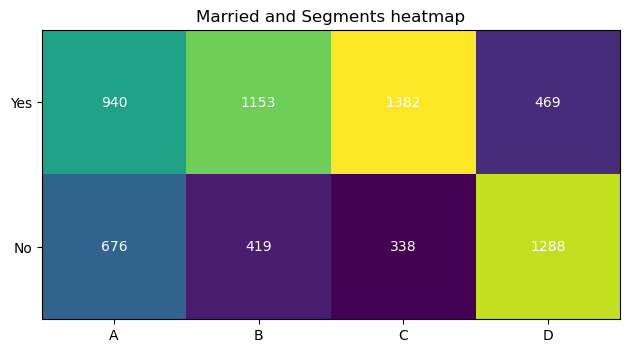

In [105]:
#repeating that but for Married and unmarried records
MarriedMarketData = MarketData[ MarketData["Ever_Married"] == 1]
UnMarriedMarketData = MarketData[ MarketData["Ever_Married"] == 0]

SegmentsMarried =  MarriedMarketData.Segmentation.value_counts()
SegmentsUnMarried =  UnMarriedMarketData.Segmentation.value_counts()


SegmentsMarried = [SegmentsMarried['A'], SegmentsMarried['B'], SegmentsMarried['C'], SegmentsMarried['D']]
SegmentsUnMarried = [SegmentsUnMarried['A'], SegmentsUnMarried['B'], SegmentsUnMarried['C'], SegmentsUnMarried['D']]

Segments = [SegmentsMarried, SegmentsUnMarried]


Married = ['Yes', 'No']
Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Segments)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Married)), labels=Married)


# Loop over data dimensions and create text annotations.
for i in range(len(Married)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Segments[i][j],ha="center", va="center", color="w")

ax.set_title("Married and Segments heatmap")
fig.tight_layout()
plt.show()

The biggest biases are towards D for unmaried, and away from D for Married

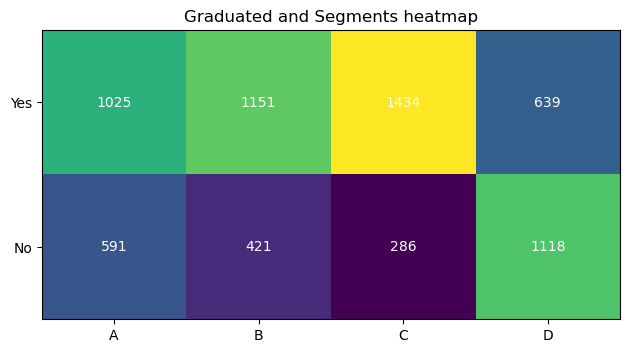

In [106]:
#Again the same but for graduates
GraduatedMarketData = MarketData[ MarketData["Graduated"] == 1]
NotGraduatedMarketData = MarketData[ MarketData["Graduated"] == 0]

SegmentsGraduated =  GraduatedMarketData.Segmentation.value_counts()
SegmentsNotGraduated =  NotGraduatedMarketData.Segmentation.value_counts()


SegmentsGraduated = [SegmentsGraduated['A'], SegmentsGraduated['B'], SegmentsGraduated['C'], SegmentsGraduated['D']]
SegmentsNotGraduated = [SegmentsNotGraduated['A'], SegmentsNotGraduated['B'], SegmentsNotGraduated['C'], SegmentsNotGraduated['D']]

Segments = [SegmentsGraduated, SegmentsNotGraduated]


Graduated = ['Yes', 'No']
Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Segments)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Graduated)), labels=Graduated)


# Loop over data dimensions and create text annotations.
for i in range(len(Graduated)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Segments[i][j],ha="center", va="center", color="w")

ax.set_title("Graduated and Segments heatmap")
fig.tight_layout()
plt.show()

Similar bais to married, Graduates are baised away from D, but non-graduates are baised towards D

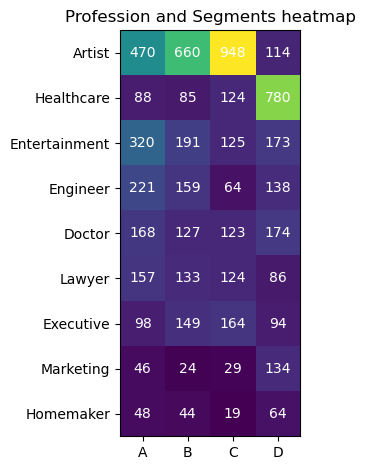

In [107]:
#repeated for professions, but this time all of them 
Professions = ['Artist','Healthcare','Entertainment','Engineer','Doctor','Lawyer','Executive','Marketing','Homemaker']
Counts = []

for i in Professions:
    tempstring = "Profession_" + i
    tempdf = MarketData[MarketData[tempstring] == 1]
    SegmentTemp = tempdf.Segmentation.value_counts()
    temp = [SegmentTemp['A'], SegmentTemp['B'], SegmentTemp['C'], SegmentTemp['D']]
    Counts.append(temp)

Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Counts)

#Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Professions)), labels=Professions)


# Loop over data dimensions and create text annotations.
for i in range(len(Professions)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Counts[i][j],ha="center", va="center", color="w")

ax.set_title("Profession and Segments heatmap")
fig.tight_layout()
plt.show()

A lot of data here but the main points are, Artists baised away from D and Healthcare baised towards D

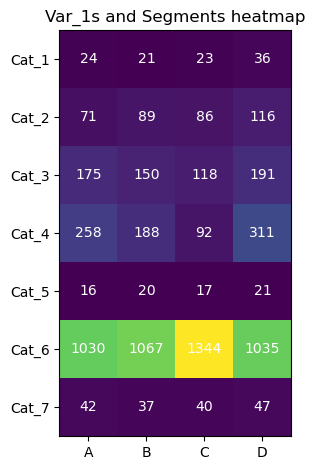

In [108]:
#again for Var_1
Var_1s = ['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7']
Counts = []

for i in Var_1s:
    tempstring = "Var_1_" + i
    tempdf = MarketData[MarketData[tempstring] == 1]
    SegmentTemp = tempdf.Segmentation.value_counts()
    temp = [SegmentTemp['A'], SegmentTemp['B'], SegmentTemp['C'], SegmentTemp['D']]
    Counts.append(temp)

Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Counts)

#Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Var_1s)), labels=Var_1s)


# Loop over data dimensions and create text annotations.
for i in range(len(Var_1s)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Counts[i][j],ha="center", va="center", color="w")

ax.set_title("Var_1s and Segments heatmap")
fig.tight_layout()
plt.show()

Cat_4 biased away from C, Cat_6 biased towards C

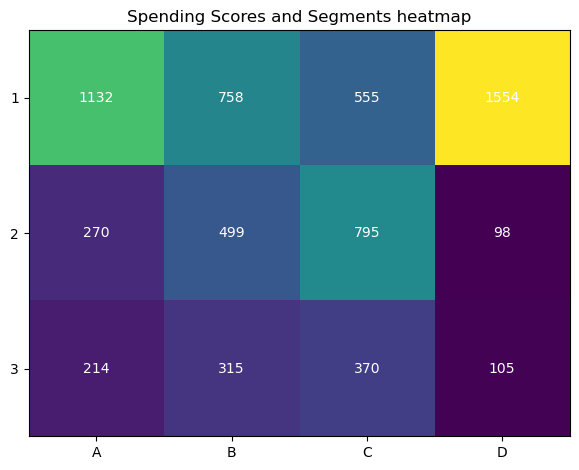

In [109]:
#and again for spending scores
SpendingScores = [1,2,3]
Counts = []

for i in SpendingScores:
    tempdf = MarketData[MarketData["Spending_Score"] == i]
    SegmentTemp = tempdf.Segmentation.value_counts()
    temp = [SegmentTemp['A'], SegmentTemp['B'], SegmentTemp['C'], SegmentTemp['D']]
    Counts.append(temp)

Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Counts)

#Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(SpendingScores)), labels=SpendingScores)


# Loop over data dimensions and create text annotations.
for i in range(len(SpendingScores)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Counts[i][j],ha="center", va="center", color="w")

ax.set_title("Spending Scores and Segments heatmap")
fig.tight_layout()
plt.show()

Lowest spending scores baised towards A and D, while the higher two are biased away from those

## 4. Identify correlated variables

C:\Users\JackM\AppData\Local\Temp\ipykernel_12396\2204324990.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

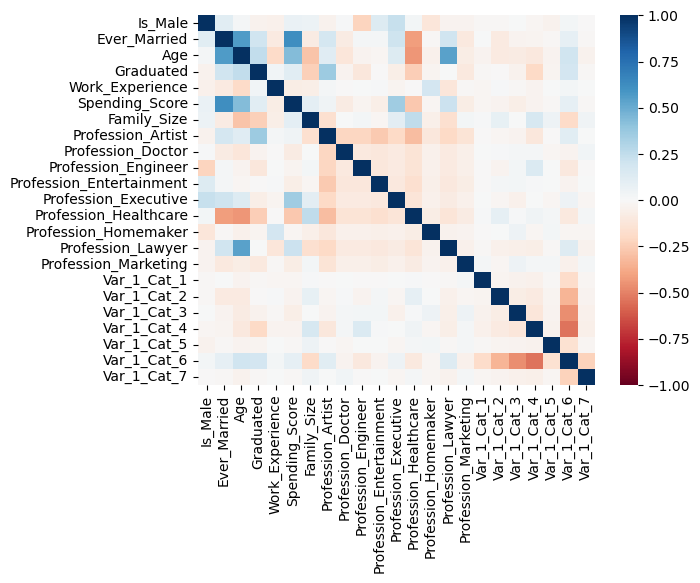

In [110]:
#Generating a correlation matrix for the market data, then plotting that as a heatmap.
corr = MarketData.corr()

sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1)

We can ignore the diagonal as that is correlation of a value with itself, we can also ignore correlation within the one-hot values (Var_1, and professions) as they are mutually exclusive. White values show no correlation, blue values show positive and red negative. The strongest correlations clear from this are    
Positive correlations between   
-Age and Ever_Married, older people in the sample are more likely to be married   
-Spending_Score and Ever_Married, those in sample who are married tend to have higher spending scores   
-Profession_Lawyer and Age, Lawyers in the sample tend to be older   
and some weaker positive correlations exist too     
-executive and spending score   
-healthcare and family size   
-age and spending score   
-graduated and artist   
-graduated and age   
-graduated and married   

There are no particularly strong negative correlations, but the strongest ones are    
-Healthcare and age   
-Helathcare and married   

In [111]:
#writing output to csv file, and giving a final display of top 10 rows
MarketData.to_csv('PreprocessedMarketData.csv')
MarketData.head(10)

,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.247191,0,0.071429,1,0.444444,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0.752809,1,0.071429,1,0.111111,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0.752809,1,0.000000,3,0.222222,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,1,0.629213,0,0.000000,2,0.222222,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,0.359551,1,0.071429,1,0.333333,C,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0.370787,1,0.071429,1,0.333333,D,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,1,0.685393,1,0.000000,1,0.333333,D,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0.617978,1,0.071429,2,0.444444,C,1,0,...,0,0,0,0,0,0,0,0,1,0
10,0,0,0.292135,1,0.071429,1,0.333333,A,0,0,...,0,0,0,0,0,0,0,0,1,0
11,1,0,0.213483,0,0.285714,1,0.444444,D,0,0,...,0,0,0,0,0,0,1,0,0,0


## 5. Summary

I have cleaned the data by removing records with null values, converting categorical data to one-hots, converted ordinal data to a sequence, and normalised numerical data.   
Then I made visualisations between the segment values (the goal of the classification) and the other values to find all had some correlation with the segments (none that need to be removed)  
After this I plotted the correlation matrix to find any correlations 